<a href="https://colab.research.google.com/github/prasertcbs/test/blob/master/pandas_multilevel_column_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilevel Column Names

In [1]:
!pip install seaborn==0.9.0

In [33]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: stable-baselines, missingno


In [35]:
!pwd

/content


In [37]:
!ls

barcode1.svg	   mlevel_col_names.csv   port1.csv   sample_data
ean13_barcode.svg  mlevel_col_names.xlsx  port1.xlsx


In [39]:
!ls -lF

total 44
-rw-r--r-- 1 root root 6100 Jan 14 01:40 barcode1.svg
-rw-r--r-- 1 root root 6100 Jan 14 01:40 ean13_barcode.svg
-rw-r--r-- 1 root root 2671 Jan 14 03:06 mlevel_col_names.csv
-rw-r--r-- 1 root root 6509 Jan 14 03:07 mlevel_col_names.xlsx
-rw-r--r-- 1 root root 2770 Jan 14 03:07 port1.csv
-rw-r--r-- 1 root root 6486 Jan 14 03:07 port1.xlsx
drwxr-xr-x 1 root root 4096 Jan  8 17:15 sample_data/


In [0]:
!cd sample_data

In [43]:
!ls -lF

total 44
-rw-r--r-- 1 root root 6100 Jan 14 01:40 barcode1.svg
-rw-r--r-- 1 root root 6100 Jan 14 01:40 ean13_barcode.svg
-rw-r--r-- 1 root root 2671 Jan 14 03:06 mlevel_col_names.csv
-rw-r--r-- 1 root root 6509 Jan 14 03:07 mlevel_col_names.xlsx
-rw-r--r-- 1 root root 2770 Jan 14 03:07 port1.csv
-rw-r--r-- 1 root root 6486 Jan 14 03:07 port1.xlsx
drwxr-xr-x 1 root root 4096 Jan  8 17:15 sample_data/


In [0]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [32]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.9.0


## single-level column name

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
dat=pd.read_csv(url)
dat.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [6]:
dat.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

## get stocks (multilevel column names)

In [7]:
stocks=['fb', 'aapl', 'msft']
df = data.DataReader(stocks, data_source="yahoo",
                     start="2019-01-02")
df.head()

Attributes        High                                 Low              \
Symbols           aapl          fb        msft        aapl          fb   
Date                                                                     
2019-01-02  158.850006  137.509995  101.750000  154.229996  128.559998   
2019-01-03  145.720001  137.169998  100.190002  142.000000  131.119995   
2019-01-04  148.550003  138.000000  102.510002  143.800003  133.750000   
2019-01-07  148.830002  138.869995  103.269997  145.899994  135.910004   
2019-01-08  151.820007  143.139999  103.970001  148.520004  139.539993   

Attributes                    Open                               Close  \
Symbols           msft        aapl          fb        msft        aapl   
Date                                                                     
2019-01-02   98.940002  154.889999  128.990005   99.550003  157.919998   
2019-01-03   97.199997  143.979996  134.690002  100.099998  142.190002   
2019-01-04   98.930000  144.529999  134.009995   99.720001  148.259995   
2019-01-07  100.980003  148.699997  137.559998  101.639999  147.929993   
2019-01-08  101.709999  149.559998  139.889999  103.040001  150.750000   

Attributes                            Volume                       Adj Close  \
Symbols             fb        msft      aapl        fb      msft        aapl   
Date                                                                           
2019-01-02  135.679993  101.120003  37039700  28146200  35329300  157.919998   
2019-01-03  131.740005   97.400002  91312200  22717900  42579100  142.190002   
2019-01-04  137.949997  101.930000  58607100  29002100  44060600  148.259995   
2019-01-07  138.050003  102.059998  54777800  20089300  35656100  147.929993   
2019-01-08  142.529999  102.800003  41025300  26263800  31514400  150.750000   

Attributes                          
Symbols             fb        msft  
Date                                
2019-01-02  135.679993  101.120003  
2019-01-03  131.740005   97.400002  
2019-01-04  137.949997  101.930000  
2019-01-07  138.050003  102.059998  
2019-01-08  142.529999  102.800003

In [0]:
# stocks=['scc.bk', 'bh.bk']
# df = data.DataReader(stocks, data_source="yahoo",
#                      start="2019-01-02")
# df.head()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-01-02 to 2019-01-11
Data columns (total 18 columns):
(High, aapl)         8 non-null float64
(High, fb)           8 non-null float64
(High, msft)         8 non-null float64
(Low, aapl)          8 non-null float64
(Low, fb)            8 non-null float64
(Low, msft)          8 non-null float64
(Open, aapl)         8 non-null float64
(Open, fb)           8 non-null float64
(Open, msft)         8 non-null float64
(Close, aapl)        8 non-null float64
(Close, fb)          8 non-null float64
(Close, msft)        8 non-null float64
(Volume, aapl)       8 non-null int64
(Volume, fb)         8 non-null int64
(Volume, msft)       8 non-null int64
(Adj Close, aapl)    8 non-null float64
(Adj Close, fb)      8 non-null float64
(Adj Close, msft)    8 non-null float64
dtypes: float64(15), int64(3)
memory usage: 1.2 KB


In [10]:
df.head()

Attributes        High                                 Low              \
Symbols           aapl          fb        msft        aapl          fb   
Date                                                                     
2019-01-02  158.850006  137.509995  101.750000  154.229996  128.559998   
2019-01-03  145.720001  137.169998  100.190002  142.000000  131.119995   
2019-01-04  148.550003  138.000000  102.510002  143.800003  133.750000   
2019-01-07  148.830002  138.869995  103.269997  145.899994  135.910004   
2019-01-08  151.820007  143.139999  103.970001  148.520004  139.539993   

Attributes                    Open                               Close  \
Symbols           msft        aapl          fb        msft        aapl   
Date                                                                     
2019-01-02   98.940002  154.889999  128.990005   99.550003  157.919998   
2019-01-03   97.199997  143.979996  134.690002  100.099998  142.190002   
2019-01-04   98.930000  144.529999  134.009995   99.720001  148.259995   
2019-01-07  100.980003  148.699997  137.559998  101.639999  147.929993   
2019-01-08  101.709999  149.559998  139.889999  103.040001  150.750000   

Attributes                            Volume                       Adj Close  \
Symbols             fb        msft      aapl        fb      msft        aapl   
Date                                                                           
2019-01-02  135.679993  101.120003  37039700  28146200  35329300  157.919998   
2019-01-03  131.740005   97.400002  91312200  22717900  42579100  142.190002   
2019-01-04  137.949997  101.930000  58607100  29002100  44060600  148.259995   
2019-01-07  138.050003  102.059998  54777800  20089300  35656100  147.929993   
2019-01-08  142.529999  102.800003  41025300  26263800  31514400  150.750000   

Attributes                          
Symbols             fb        msft  
Date                                
2019-01-02  135.679993  101.120003  
2019-01-03  131.740005   97.400002  
2019-01-04  137.949997  101.930000  
2019-01-07  138.050003  102.059998  
2019-01-08  142.529999  102.800003

In [11]:
df.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['aapl', 'fb', 'msft']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Attributes', 'Symbols'])

In [12]:
df['High']

Symbols,aapl,fb,msft
Date,,,
2019-01-02,158.850006,137.509995,101.750000
2019-01-03,145.720001,137.169998,100.190002
2019-01-04,148.550003,138.000000,102.510002
2019-01-07,148.830002,138.869995,103.269997
2019-01-08,151.820007,143.139999,103.970001
2019-01-09,154.529999,144.699997,104.879997
2019-01-10,153.970001,144.559998,103.750000
2019-01-11,153.699997,145.360001,103.440002


In [13]:
df['High']['fb']

Date
2019-01-02    137.509995
2019-01-03    137.169998
2019-01-04    138.000000
2019-01-07    138.869995
2019-01-08    143.139999
2019-01-09    144.699997
2019-01-10    144.559998
2019-01-11    145.360001
Name: fb, dtype: float64

In [14]:
df.loc['2019-01-08':]

Attributes        High                                 Low              \
Symbols           aapl          fb        msft        aapl          fb   
Date                                                                     
2019-01-08  151.820007  143.139999  103.970001  148.520004  139.539993   
2019-01-09  154.529999  144.699997  104.879997  149.630005  141.270004   
2019-01-10  153.970001  144.559998  103.750000  150.860001  140.839996   
2019-01-11  153.699997  145.360001  103.440002  151.509995  142.570007   

Attributes                    Open                               Close  \
Symbols           msft        aapl          fb        msft        aapl   
Date                                                                     
2019-01-08  101.709999  149.559998  139.889999  103.040001  150.750000   
2019-01-09  103.239998  151.289993  142.949997  103.860001  153.309998   
2019-01-10  102.379997  152.500000  143.080002  103.220001  153.800003   
2019-01-11  101.639999  152.880005  143.149994  103.190002  152.289993   

Attributes                            Volume                       Adj Close  \
Symbols             fb        msft      aapl        fb      msft        aapl   
Date                                                                           
2019-01-08  142.529999  102.800003  41025300  26263800  31514400  150.750000   
2019-01-09  144.229996  104.269997  45099100  22205900  32280800  153.309998   
2019-01-10  144.199997  103.599998  35780700  16125000  30067600  153.800003   
2019-01-11  143.800003  102.800003  26976300  12785900  28242100  152.289993   

Attributes                          
Symbols             fb        msft  
Date                                
2019-01-08  142.529999  102.800003  
2019-01-09  144.229996  104.269997  
2019-01-10  144.199997  103.599998  
2019-01-11  143.800003  102.800003

In [15]:
df.loc['2019-01-08':, 'Open']

Symbols,aapl,fb,msft
Date,,,
2019-01-08,149.559998,139.889999,103.040001
2019-01-09,151.289993,142.949997,103.860001
2019-01-10,152.500000,143.080002,103.220001
2019-01-11,152.880005,143.149994,103.190002


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-01-02 to 2019-01-11
Data columns (total 18 columns):
(High, aapl)         8 non-null float64
(High, fb)           8 non-null float64
(High, msft)         8 non-null float64
(Low, aapl)          8 non-null float64
(Low, fb)            8 non-null float64
(Low, msft)          8 non-null float64
(Open, aapl)         8 non-null float64
(Open, fb)           8 non-null float64
(Open, msft)         8 non-null float64
(Close, aapl)        8 non-null float64
(Close, fb)          8 non-null float64
(Close, msft)        8 non-null float64
(Volume, aapl)       8 non-null int64
(Volume, fb)         8 non-null int64
(Volume, msft)       8 non-null int64
(Adj Close, aapl)    8 non-null float64
(Adj Close, fb)      8 non-null float64
(Adj Close, msft)    8 non-null float64
dtypes: float64(15), int64(3)
memory usage: 1.5 KB


In [17]:
df.loc['2019-01-08':, ('Open', 'aapl')]

Date
2019-01-08    149.559998
2019-01-09    151.289993
2019-01-10    152.500000
2019-01-11    152.880005
Name: (Open, aapl), dtype: float64

In [18]:
df.loc['2019-01-08':'2019-01-10', ('Open', 'aapl')]

Date
2019-01-08    149.559998
2019-01-09    151.289993
2019-01-10    152.500000
Name: (Open, aapl), dtype: float64

In [19]:
df.loc['2019-01-08':'2019-01-10', ('Open', ['aapl', 'fb'])]

Attributes        Open            
Symbols           aapl          fb
Date                              
2019-01-08  149.559998  139.889999
2019-01-09  151.289993  142.949997
2019-01-10  152.500000  143.080002

In [20]:
df.loc['2019-01-08':'2019-01-10', (['Open', 'Close'], ['aapl', 'fb'])]

Attributes        Open                   Close            
Symbols           aapl          fb        aapl          fb
Date                                                      
2019-01-08  149.559998  139.889999  150.750000  142.529999
2019-01-09  151.289993  142.949997  153.309998  144.229996
2019-01-10  152.500000  143.080002  153.800003  144.199997

In [0]:
df.to_csv('mlevel_col_names.csv')
df.to_excel('mlevel_col_names.xlsx')

## stack data frame

In [22]:
df.stack()

Attributes                High         Low        Open       Close    Volume  \
Date       Symbols                                                             
2019-01-02 aapl     158.850006  154.229996  154.889999  157.919998  37039700   
           fb       137.509995  128.559998  128.990005  135.679993  28146200   
           msft     101.750000   98.940002   99.550003  101.120003  35329300   
2019-01-03 aapl     145.720001  142.000000  143.979996  142.190002  91312200   
           fb       137.169998  131.119995  134.690002  131.740005  22717900   
           msft     100.190002   97.199997  100.099998   97.400002  42579100   
2019-01-04 aapl     148.550003  143.800003  144.529999  148.259995  58607100   
           fb       138.000000  133.750000  134.009995  137.949997  29002100   
           msft     102.510002   98.930000   99.720001  101.930000  44060600   
2019-01-07 aapl     148.830002  145.899994  148.699997  147.929993  54777800   
           fb       138.869995  135.910004  137.559998  138.050003  20089300   
           msft     103.269997  100.980003  101.639999  102.059998  35656100   
2019-01-08 aapl     151.820007  148.520004  149.559998  150.750000  41025300   
           fb       143.139999  139.539993  139.889999  142.529999  26263800   
           msft     103.970001  101.709999  103.040001  102.800003  31514400   
2019-01-09 aapl     154.529999  149.630005  151.289993  153.309998  45099100   
           fb       144.699997  141.270004  142.949997  144.229996  22205900   
           msft     104.879997  103.239998  103.860001  104.269997  32280800   
2019-01-10 aapl     153.970001  150.860001  152.500000  153.800003  35780700   
           fb       144.559998  140.839996  143.080002  144.199997  16125000   
           msft     103.750000  102.379997  103.220001  103.599998  30067600   
2019-01-11 aapl     153.699997  151.509995  152.880005  152.289993  26976300   
           fb       145.360001  142.570007  143.149994  143.800003  12785900   
           msft     103.440002  101.639999  103.190002  102.800003  28242100   

Attributes           Adj Close  
Date       Symbols              
2019-01-02 aapl     157.919998  
           fb       135.679993  
           msft     101.120003  
2019-01-03 aapl     142.190002  
           fb       131.740005  
           msft      97.400002  
2019-01-04 aapl     148.259995  
           fb       137.949997  
           msft     101.930000  
2019-01-07 aapl     147.929993  
           fb       138.050003  
           msft     102.059998  
2019-01-08 aapl     150.750000  
           fb       142.529999  
           msft     102.800003  
2019-01-09 aapl     153.309998  
           fb       144.229996  
           msft     104.269997  
2019-01-10 aapl     153.800003  
           fb       144.199997  
           msft     103.599998  
2019-01-11 aapl     152.289993  
           fb       143.800003  
           msft     102.800003

In [23]:
ds=df.stack().reset_index()
ds

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,aapl,158.850006,154.229996,154.889999,157.919998,37039700,157.919998
1,2019-01-02,fb,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2,2019-01-02,msft,101.750000,98.940002,99.550003,101.120003,35329300,101.120003
3,2019-01-03,aapl,145.720001,142.000000,143.979996,142.190002,91312200,142.190002
4,2019-01-03,fb,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
5,2019-01-03,msft,100.190002,97.199997,100.099998,97.400002,42579100,97.400002
6,2019-01-04,aapl,148.550003,143.800003,144.529999,148.259995,58607100,148.259995
7,2019-01-04,fb,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
8,2019-01-04,msft,102.510002,98.930000,99.720001,101.930000,44060600,101.930000
9,2019-01-07,aapl,148.830002,145.899994,148.699997,147.929993,54777800,147.929993


In [24]:
ds.sort_values(['Symbols', 'Date'])

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,aapl,158.850006,154.229996,154.889999,157.919998,37039700,157.919998
3,2019-01-03,aapl,145.720001,142.000000,143.979996,142.190002,91312200,142.190002
6,2019-01-04,aapl,148.550003,143.800003,144.529999,148.259995,58607100,148.259995
9,2019-01-07,aapl,148.830002,145.899994,148.699997,147.929993,54777800,147.929993
12,2019-01-08,aapl,151.820007,148.520004,149.559998,150.750000,41025300,150.750000
15,2019-01-09,aapl,154.529999,149.630005,151.289993,153.309998,45099100,153.309998
18,2019-01-10,aapl,153.970001,150.860001,152.500000,153.800003,35780700,153.800003
21,2019-01-11,aapl,153.699997,151.509995,152.880005,152.289993,26976300,152.289993
1,2019-01-02,fb,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
4,2019-01-03,fb,137.169998,131.119995,134.690002,131.740005,22717900,131.740005


In [25]:
ds[ds.Symbols=='fb']

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
1,2019-01-02,fb,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
4,2019-01-03,fb,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
7,2019-01-04,fb,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
10,2019-01-07,fb,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
13,2019-01-08,fb,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
16,2019-01-09,fb,144.699997,141.270004,142.949997,144.229996,22205900,144.229996
19,2019-01-10,fb,144.559998,140.839996,143.080002,144.199997,16125000,144.199997
22,2019-01-11,fb,145.360001,142.570007,143.149994,143.800003,12785900,143.800003


## Visualize

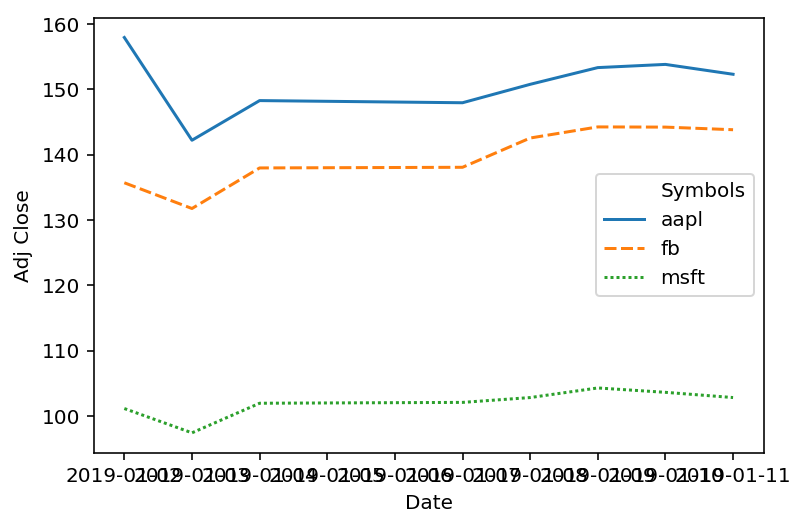

In [26]:
sns.lineplot(x='Date', y='Adj Close', hue='Symbols',
             style='Symbols',
             data=ds);

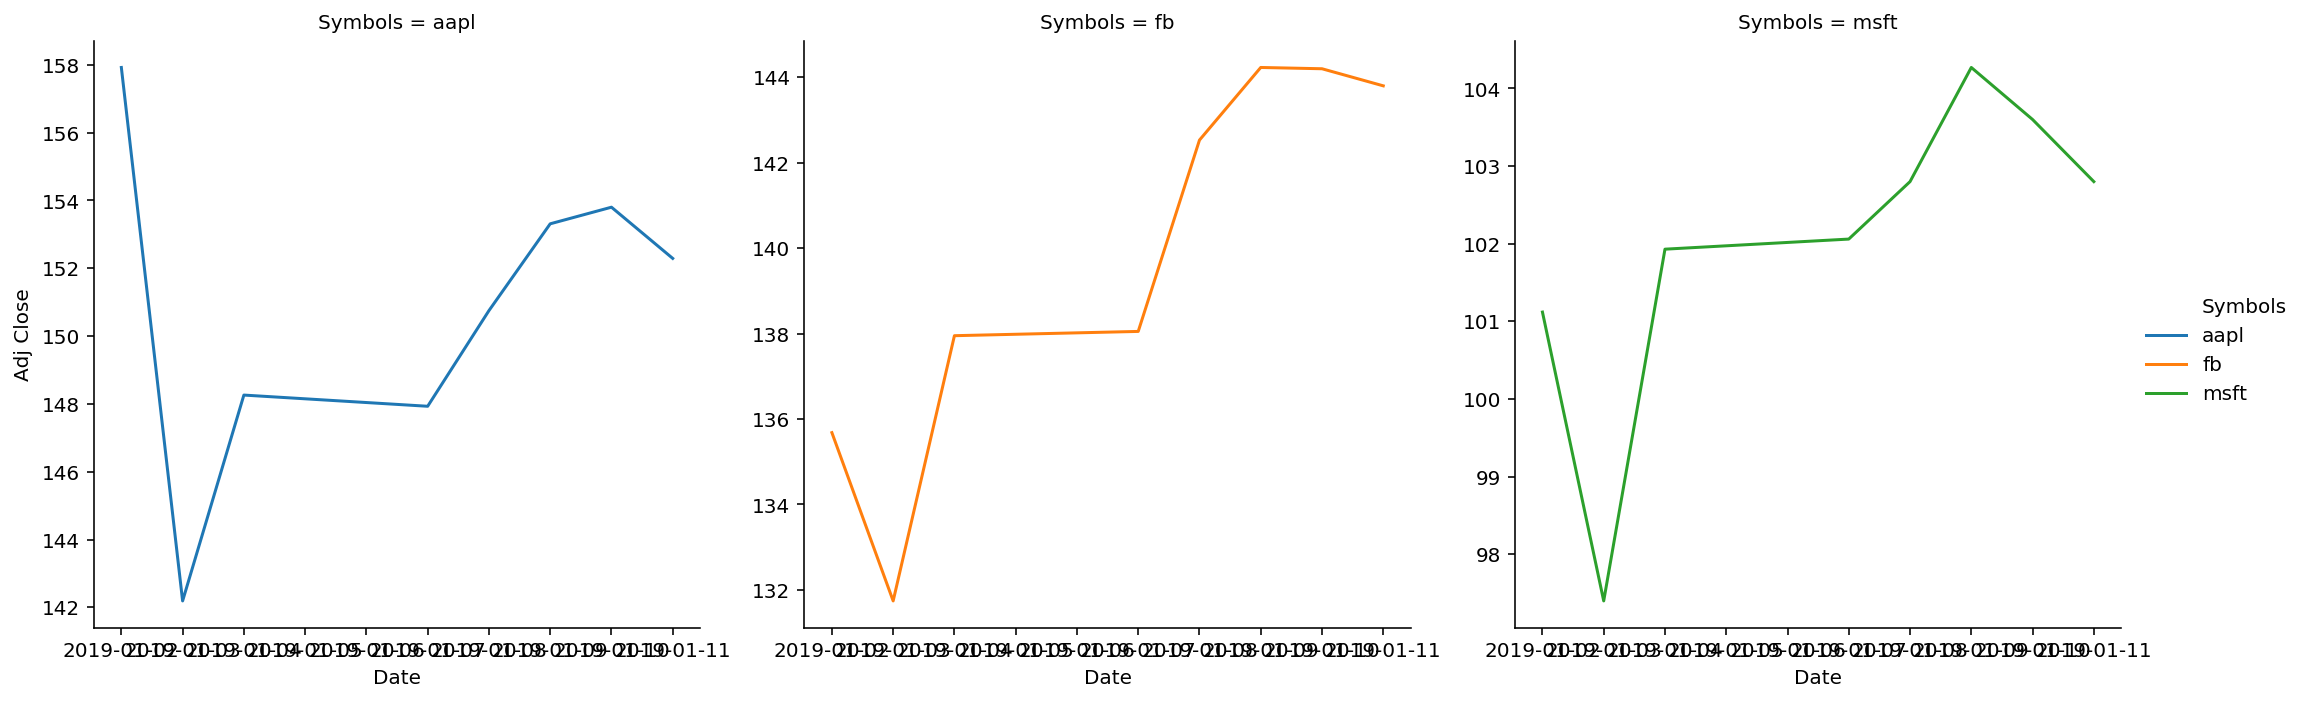

In [27]:
sns.relplot(x='Date', y='Adj Close', col='Symbols',
            hue='Symbols',
            kind='line',
            height=5,
            facet_kws={'sharey': False},
            data=ds)

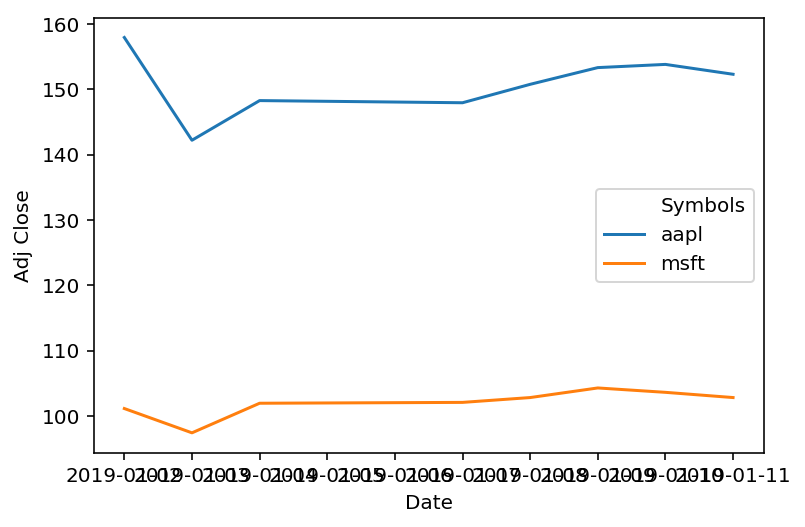

In [28]:
sns.lineplot(x='Date', y='Adj Close', hue='Symbols',
             data=ds[ds.Symbols.str.match('aapl|msft')]);

## Save to CSV

In [0]:
ds.to_csv('port1.csv', index=False)
ds.to_excel('port1.xlsx', index=False)